In [1]:
%matplotlib inline

Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from models import *
from imshow import *
from train import *
from test import *

#### Transform

Checking for GPU and using that in the code below


In [3]:
SEED = 1

# CUDA?
# cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("CUDA Available?", device)

# For reproducibility
torch.manual_seed(SEED)

if device:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=4, num_workers=2, pin_memory=True) if device else dict(shuffle=True, batch_size=4)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,** dataloader_args)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, **dataloader_args)
# testloader=transformers(test)
# trainloader=transformers(train)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

CUDA Available? cuda:0


 99%|███████████████████████████████████████████████████████████████▍| 169025536/170498071 [03:08<00:02, 716375.51it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



plane   dog  deer  deer


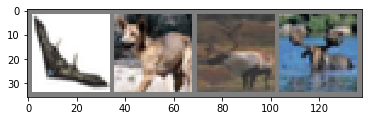

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Summary

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

170500096it [03:20, 716375.51it/s]                                                                                     

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

### 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

GroundTruth:   frog plane truck  frog


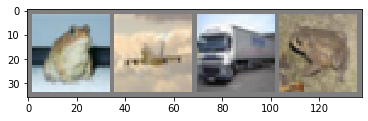

In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
images = images.to(device)
outputs = net(images)


In [9]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog  bird   dog  bird


### Achieve 85 and above accuracy


In [10]:
for epoch in range(40):
    train(net, device, trainloader, optimizer,criterion, epoch)
    test(net, device, testloader, criterion)

[1,  2000] loss: 1.962
[1,  4000] loss: 1.602
[1,  6000] loss: 1.381
[1,  8000] loss: 1.205
[1, 10000] loss: 1.133
[1, 12000] loss: 1.045
Finished Training for EPCOH:  0

Test set: Average loss: 0.2264, Accuracy: 6779/10000 (68%)

[2,  2000] loss: 0.888
[2,  4000] loss: 0.883
[2,  6000] loss: 0.825
[2,  8000] loss: 0.806
[2, 10000] loss: 0.764
[2, 12000] loss: 0.749
Finished Training for EPCOH:  1

Test set: Average loss: 0.1745, Accuracy: 7555/10000 (76%)

[3,  2000] loss: 0.638
[3,  4000] loss: 0.639
[3,  6000] loss: 0.639
[3,  8000] loss: 0.620
[3, 10000] loss: 0.623
[3, 12000] loss: 0.602
Finished Training for EPCOH:  2

Test set: Average loss: 0.1501, Accuracy: 7958/10000 (80%)

[4,  2000] loss: 0.483
[4,  4000] loss: 0.505
[4,  6000] loss: 0.511
[4,  8000] loss: 0.491
[4, 10000] loss: 0.490
[4, 12000] loss: 0.498
Finished Training for EPCOH:  3

Test set: Average loss: 0.1371, Accuracy: 8108/10000 (81%)

[5,  2000] loss: 0.379
[5,  4000] loss: 0.386
[5,  6000] loss: 0.398
[5,  80

Finished Training for EPCOH:  34

Test set: Average loss: 0.1548, Accuracy: 8187/10000 (82%)

[36,  2000] loss: 0.078
[36,  4000] loss: 0.064
[36,  6000] loss: 0.060
[36,  8000] loss: 0.080
[36, 10000] loss: 0.092
[36, 12000] loss: 0.095
Finished Training for EPCOH:  35

Test set: Average loss: 0.1583, Accuracy: 8182/10000 (82%)

[37,  2000] loss: 0.052
[37,  4000] loss: 0.071
[37,  6000] loss: 0.092
[37,  8000] loss: 0.087
[37, 10000] loss: 0.084
[37, 12000] loss: 0.107
Finished Training for EPCOH:  36

Test set: Average loss: 0.1514, Accuracy: 8266/10000 (83%)

[38,  2000] loss: 0.065
[38,  4000] loss: 0.062
[38,  6000] loss: 0.082
[38,  8000] loss: 0.098
[38, 10000] loss: 0.110
[38, 12000] loss: 0.109
Finished Training for EPCOH:  37

Test set: Average loss: 0.1418, Accuracy: 8266/10000 (83%)

[39,  2000] loss: 0.067
[39,  4000] loss: 0.076
[39,  6000] loss: 0.070
[39,  8000] loss: 0.091
[39, 10000] loss: 0.102
[39, 12000] loss: 0.098
Finished Training for EPCOH:  38

Test set: Aver

In [11]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 89 %
Accuracy of   car : 85 %
Accuracy of  bird : 79 %
Accuracy of   cat : 60 %
Accuracy of  deer : 86 %
Accuracy of   dog : 69 %
Accuracy of  frog : 84 %
Accuracy of horse : 78 %
Accuracy of  ship : 87 %
Accuracy of truck : 94 %
